In [9]:
import os
import sys
import pandas as pd
import numpy as np
import nltk
from IPython.display import display

# grab the data
data = pd.read_csv('dataset.csv')
jp = pd.read_csv('data_jp.csv')
njp = pd.read_csv('data_njp.csv')

## Training the Regular registrations

In [10]:
y = njp[['is_lolos_seleksi']]
X = njp.drop(['is_lolos_seleksi'], axis=1)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 42)

### with criterion gini index

Model accuracy score with criterion gini index: 0.9373
Training-set accuracy score: 1.0000
Training set score: 1.0000
Test set score: 0.9373
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        78
           1       0.97      0.96      0.96       432

    accuracy                           0.94       510
   macro avg       0.88      0.88      0.88       510
weighted avg       0.94      0.94      0.94       510



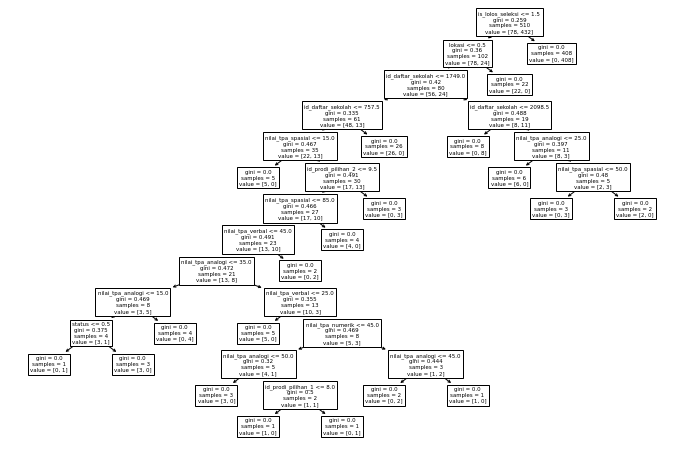

In [12]:
from sklearn.tree import DecisionTreeClassifier

clf_gini = DecisionTreeClassifier(criterion='gini')

# fit the model
clf_gini.fit(X_train, y_train)

# Predict the Test set results with criterion gini index
y_pred_gini = clf_gini.predict(X_test)

# Check accuracy score with criterion gini index
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

# Compare the train-set and test-set accuracy
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

# Check for overfitting and underfitting
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

# Visualize decision-trees
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train),feature_names=njp.columns) 

# classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_gini))

In [13]:
from sklearn.model_selection import validation_curve
train_scores, valid_scores = validation_curve(clf_gini, X, y, param_name="ccp_alpha", param_range=np.logspace(-7, 3, 3),cv=5)
print('Training Score:')
print(train_scores)
print('Validation SCore:')
print(valid_scores)

Training Score:
[[1.         1.         1.         1.         1.        ]
 [0.93504902 0.95343137 0.93382353 0.95343137 0.99877451]
 [0.84681373 0.84681373 0.84681373 0.84681373 0.84803922]]
Validation SCore:
[[0.93137255 0.96568627 0.93627451 0.95588235 0.74019608]
 [0.99509804 1.         1.         1.         0.74019608]
 [0.84803922 0.84803922 0.84803922 0.84803922 0.84313725]]


### with criterion Enthropy 

Model accuracy score with criterion entropy: 0.9373
Training-set accuracy score: 1.0000
Training set score: 1.0000
Test set score: 0.9373
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        78
           1       0.97      0.96      0.96       432

    accuracy                           0.94       510
   macro avg       0.88      0.88      0.88       510
weighted avg       0.94      0.94      0.94       510



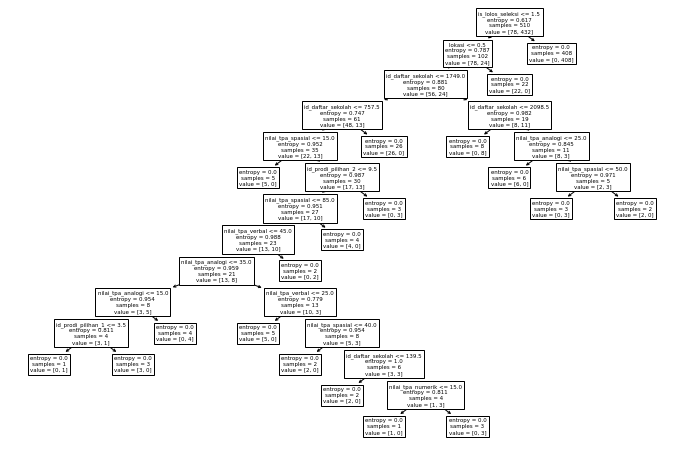

In [14]:
clf_en = DecisionTreeClassifier(criterion='entropy')
clf_en.fit(X_train, y_train)

# Predict the Test set results with criterion entropy
y_pred_en = clf_en.predict(X_test)

# Check accuracy score with criterion entropy
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

# Compare the train-set and test-set accuracy
y_pred_train_en = clf_en.predict(X_train)
y_pred_train_en
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

# Check for overfitting and underfitting
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

# Visualize decision-trees
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train),feature_names=njp.columns) 
# classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

In [15]:
from sklearn.model_selection import validation_curve
from sklearn.linear_model import Ridge
train_scores, valid_scores = validation_curve(clf_en, X, y, param_name="ccp_alpha", param_range=np.logspace(-7, 3, 3),cv=5)
print('Training Score:')
print(train_scores)
print('Validation SCore:')
print(valid_scores)

#memba

Training Score:
[[1.         1.         1.         1.         1.        ]
 [0.95465686 0.95343137 0.95343137 0.95343137 0.99877451]
 [0.84681373 0.84681373 0.84681373 0.84681373 0.84803922]]
Validation SCore:
[[0.97058824 0.96078431 0.96568627 0.94117647 0.74019608]
 [0.99509804 1.         1.         1.         0.74019608]
 [0.84803922 0.84803922 0.84803922 0.84803922 0.84313725]]


### default out-of-the-box

Model accuracy score with criterion gini index: 0.9373
Training-set accuracy score: 1.0000
Training set score: 1.0000
Test set score: 0.9373
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        78
           1       0.97      0.96      0.96       432

    accuracy                           0.94       510
   macro avg       0.88      0.88      0.88       510
weighted avg       0.94      0.94      0.94       510



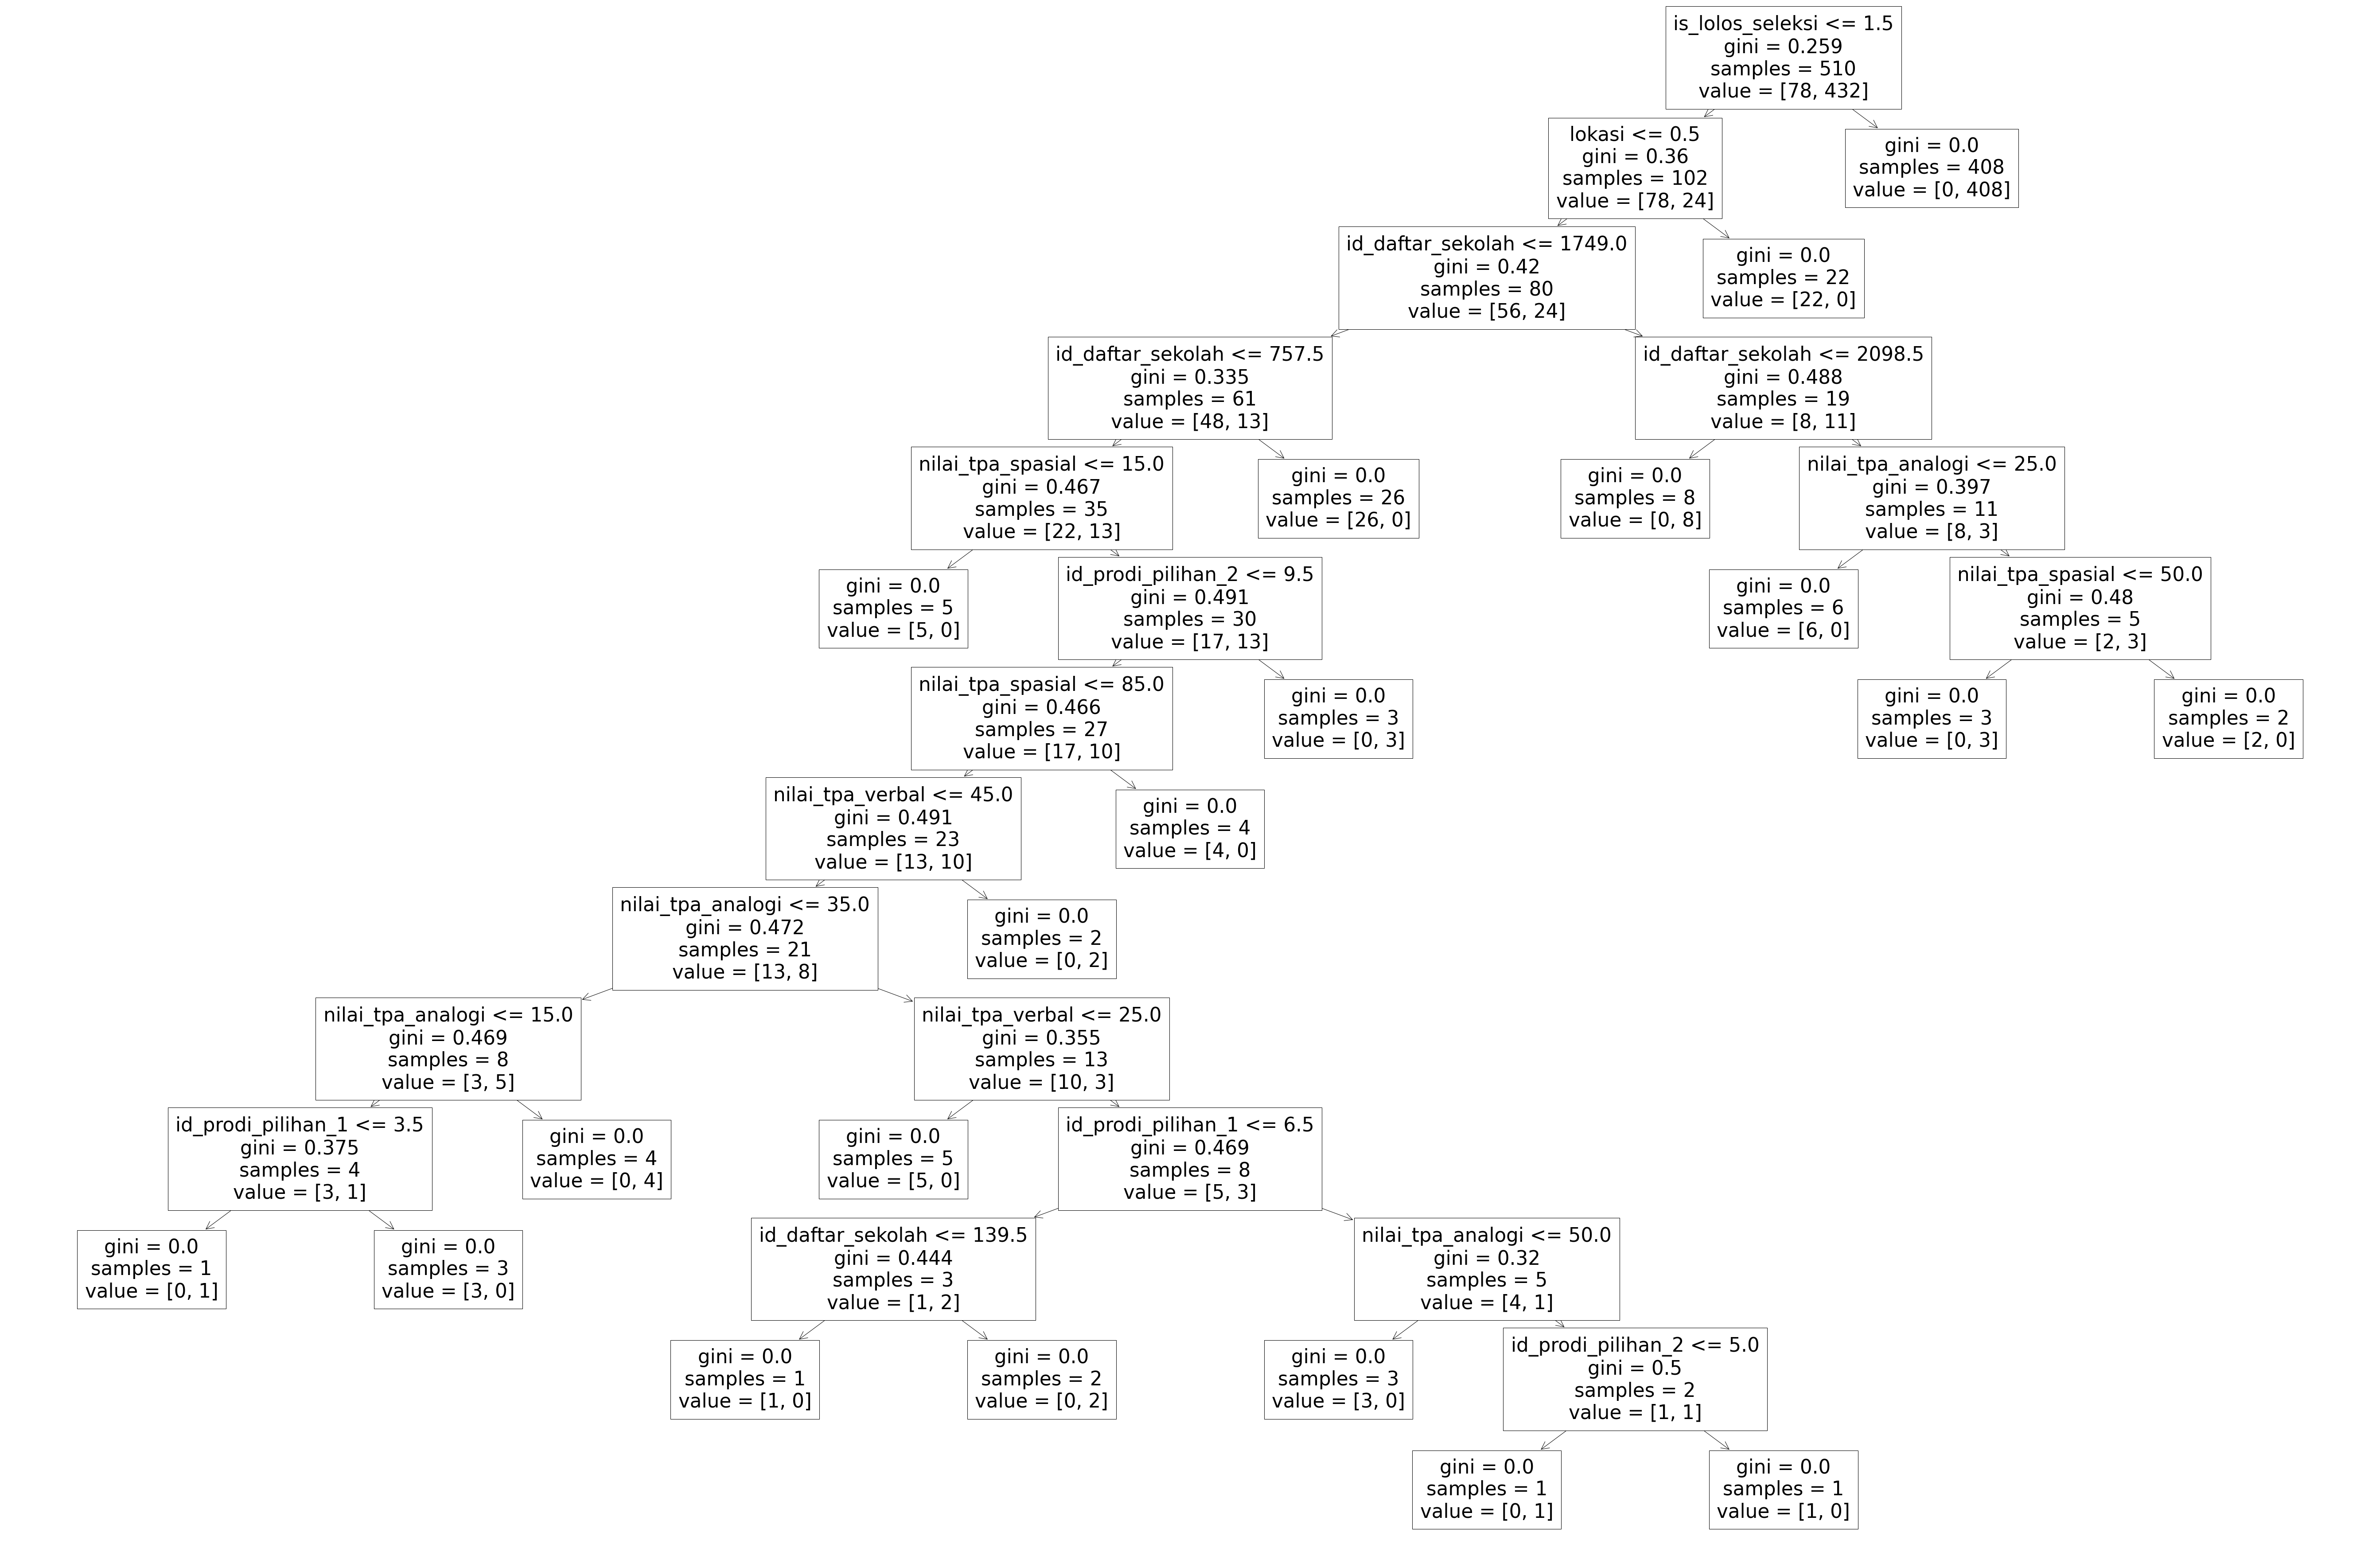

In [16]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

# fit the model
clf.fit(X_train, y_train)

# Predict the Test set results with criterion gini index
y_pred = clf.predict(X_test)

# Check accuracy score with criterion gini index
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

# Compare the train-set and test-set accuracy
y_pred_train = clf.predict(X_train)

y_pred_train
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

# Check for overfitting and underfitting
print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

# Visualize decision-trees
import matplotlib.pyplot as plt
plt.figure(figsize=(96,64))

from sklearn import tree

tree.plot_tree(clf.fit(X_train, y_train),feature_names=njp.columns) 

# classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

## Training the Special registrations

In [20]:
Y = jp[['is_lolos_seleksi']]
X = jp.drop(['is_lolos_seleksi'], axis=1)

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.5, random_state = 42)
X_train.shape, X_test.shape

((812, 9), (812, 9))

### with criterion gini index

In [22]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

# Predict the Test set results with criterion gini index
y_pred_gini = clf_gini.predict(X_test)

# Check accuracy score with criterion gini index
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

# Compare the train-set and test-set accuracy
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

# Check for overfitting and underfitting
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

# Visualize decision-trees
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train),feature_names=njp.columns) 

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

### with criterion Enthropy 

In [18]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(X_train, y_train)

# Predict the Test set results with criterion entropy
y_pred_en = clf_en.predict(X_test)

# Check accuracy score with criterion entropy
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

# Compare the train-set and test-set accuracy
y_pred_train_en = clf_en.predict(X_train)
y_pred_train_en
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

# Check for overfitting and underfitting
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

# Visualize decision-trees
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train),feature_names=njp.columns) 

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').